 # Data Wrangling

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time, pickle, os
from sklearn import datasets, model_selection, metrics, svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve

# Dataset loaded in
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Analyze the DataSet

In [11]:
# Data Set inspection
df.shape
# Looking for Missing Values
df.info()
# Data Statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# DATA CLEANING

In [13]:
# Handling the missing values in TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

# Add 0's for missing TotalCharges 
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Convert SeniorCitizen from int to categorical to identify the Category of individual citizens 
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Converted columns to categorical to optimize the dataset before further analysis


In [15]:
categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
# Turned each column into categorical variables based on (Yes, No).
for col in categories:
    df[col] = df[col].astype('category')
df[col]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: category
Categories (2, object): ['No', 'Yes']

 ## Box plot created for numerical columns of outliers

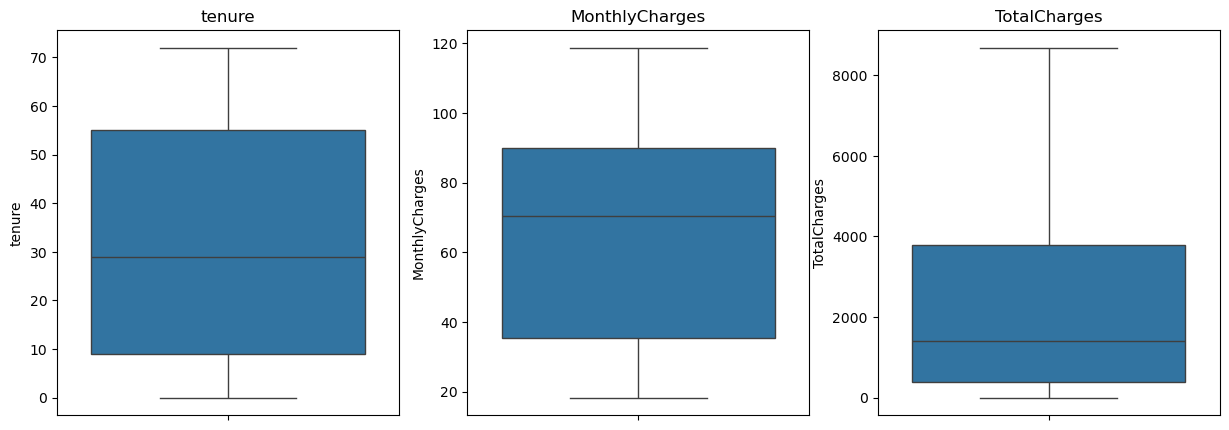

In [21]:
# Wanted to Analyize the tenure, monthlycharge, and totalcharges to get an idea of the average charges.
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# looping through the num_cols columns
for x, col in enumerate(num_cols):
    # A boxplot is created for each 'x' subplot
    sns.boxplot(data=df, y=col, ax=axes[x])
    # title
    axes[x].set_title(col)
# Show the plot
plt.show()

## Box Plot Analysis
The median tenure of 29 months shows that half of the customers stay for less than 2.5 years. A median monthly charge of 70 suggests that pricing is typically mid-range, while the median total spend of 1,000 indicates that most customers contribute a modest lifetime value before possibly churning.

# Customer Segmentation Based on Tenure

In [25]:
# I grouped the customers into categories based on the tenure for the years instead of the values.
# I created unique bins correlating with each of the years.
bins = [-1, 12, 24, 36, 48, 60, 72]
labels = ['0-1yr', '1-2yr', '2-3yr', '3-4yr', '4-5yr', '5-6yr']
# I then grouped each of the tenures, using the cut function I can turn the numerical data into unique variables so I can categorize the numerical
# column easier for instance tensure.
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)

# I want to create a column that indicates what customers use none of the additional services.
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# The new column is if the customer says no to all of these services, then NoAddServices is 1, or else it is 0. 
# Returns True if the customer answered No for that particular service.
df['NoAddServices'] = (df[services] == 'No').all(axis=1).astype(int)

# I then assign each of the customers' monthly charges at the moment as their average.
df['AvgMonthlyCharge'] = df['MonthlyCharges']  
# Looks to see if the customer has any tensure, being that they worked for the company for at least 1 month. So I do not divide by 0.
some_tensure = df['tenure'] > 0  
# For customers that dont have 0 tensure, I calcualted the total monthly charge to give a more real scenario regarding their monthly spending.
# By dividing their TotalCharges by the tenure.
df.loc[some_tensure, 'AvgMonthlyCharge'] = df['TotalCharges'] / df['tenure']

# I created an interaction feature between InternetService and Contract to obtain a better analysis if possible.
# I converted the InternetService and Contract into strings and seperated by an underscore to better understand how 
# these combinations impact churn, and making it easier when creating my machine learning models. 
df['InternetContract'] = df['InternetService'].astype(str) + "_" + df['Contract'].astype(str)

# Results
print(df['tenure_group'])
print(df['AvgMonthlyCharge'])
print(df['InternetContract'])

0       0-1yr
1       2-3yr
2       0-1yr
3       3-4yr
4       0-1yr
        ...  
7038    1-2yr
7039    5-6yr
7040    0-1yr
7041    0-1yr
7042    5-6yr
Name: tenure_group, Length: 7043, dtype: category
Categories (6, object): ['0-1yr' < '1-2yr' < '2-3yr' < '3-4yr' < '4-5yr' < '5-6yr']
0        29.850000
1        55.573529
2        54.075000
3        40.905556
4        75.825000
           ...    
7038     82.937500
7039    102.262500
7040     31.495455
7041     76.650000
7042    103.704545
Name: AvgMonthlyCharge, Length: 7043, dtype: float64
0               DSL_Month-to-month
1                     DSL_One year
2               DSL_Month-to-month
3                     DSL_One year
4       Fiber optic_Month-to-month
                   ...            
7038                  DSL_One year
7039          Fiber optic_One year
7040            DSL_Month-to-month
7041    Fiber optic_Month-to-month
7042          Fiber optic_Two year
Name: InternetContract, Length: 7043, dtype: object


### Post Processing

Customers are classified into tenure categories such as "0-1yr," "2-3yr," and "5-6yr" based on the results, some of the customers do not engage with additional services (NoAddServices = 1). The InternetContract feature combines internet service types and contract lengths such as 'DSL_Month-to-month'and 'Fiber optic_One year'. The average monthly charge (AvgMonthlyCharge) ranges from 29.85 to 103.20. This suggests that they have distinct churn risks and service usage trends.

# MACHINE LEARNING MODELING PORTION CHURN OR NO CHURN




In [28]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].map({'No': 0, 'Yes': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Split the Data for X into categorical and numerical columns.
# categorical_cols takes all the columns in X that contain text data/ 'Object Data' - Strings
categorical_cols = X.select_dtypes(include='object').columns
# numerical_cols is the list of names of all numerical columns like charges and tenure to name a few.
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [32]:
# I then preprocess the data to apply the proper techniques to the numerical and categorical columns.
# The numerical columns are scaled, while the categorical columns (objects) are converted to numbers via (OneHotEncoder())
# so that the machine learning algorithms can use them.
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])


In [144]:
# Two Models are used: 'Logistic Regression' and 'Random Forest'.
# Logistic Regression is used to illustrate and predict a binary outcome, like whether a customer will say yes or no.
# Random Forest uses multiple decision trees to vote on the best decision. It reduces the weakness of a single decision tree
# by averaging over many trees, reducing overfitting.
# !pip install lightgbm
from lightgbm import LGBMClassifier

models = {
    "Logistic Regression": {
        # up to 1000 iterations are trained with the class weight being balanced to 
        # adjust the weights inversely proportional to the frequencies of the classes to treat classes fairly.
        'model': LogisticRegression(max_iter=1000,random_state=42),
        # classifier_C represents the model inside a pipeline, using values small to large, illustrates the complexity of the model
        # smaller=less complex, with larger=potential overfitting
        'params': {
            'classifier__C': [0.1, 1],  # Reduced options
            'classifier__solver': ['liblinear'],  # Fastest solver
            'classifier__class_weight': ['balanced', None]
        }
    },
        "Random Forest": {
        # the class weight being balanced to adjust the weights inversely proportional to the frequencies 
        # of the classes to treat classes fairly.
        'model': RandomForestClassifier(random_state=42,n_jobs=-1,warm_start=True,oob_score=True),
        # n_estimators represnts the number of decision tress to build 
        'params': {
            'classifier__n_estimators': [200, 250],  # More trees for stability
            'classifier__max_depth': [None],         # Let trees grow fully
            'classifier__min_samples_split': [2, 3], # More flexible splits
            'classifier__min_samples_leaf': [1, 2],  # Smaller leaves
            'classifier__max_samples': [0.6],        # More diversity in trees
            'classifier__max_features': [0.2, 0.25], # Stricter feature sampling
            'classifier__class_weight': [
                {0:1, 1:3},  # Aggressive churner weighting
                'balanced_subsample'  # Better than 'balanced' for RF
            ],
            'classifier__ccp_alpha': [0, 0.001]  # Cost-complexity pruning
        }
    }
}

In [146]:
# Created empty dictionaries to store the evaluation results and best models
results = {}
best_models = {}

# Looped through each  of the models (Logistic Regression and Random Forest)
for model_name in models:
    print(f"\nTraining {model_name}")


 # Created a pipeline that preprocesses and then trains the models 
 # (Logistic Regression and Random Forest) for numeric and categorical data.
    pipeline = Pipeline([
        ('preprocessing', preprocessor),      
        ('classifier', models[model_name]['model'])      
    ])

    # Used GridSearchCV to try different model parameters and pick the best one
    grid_search = GridSearchCV(
        # Added Pipeline
        estimator=pipeline,                    
        # Parameter options 
         param_grid=models[model_name]['params'],
        # Evaluated the F1 score
        scoring='f1',
        # Used 5 fold cross validation to preserve the class balance
        cv=StratifiedKFold(5, shuffle=True, random_state=42),  # Better CV setup
        # Using all CPU cores to run it as quick as possible
        n_jobs=-1, 
        verbose=1  # Shows progress
    )

    # Measured how long the training takes
    # Starting timing
    start_time = time.time()  
    # Trained the models with the training data using grid_search and then fitting the data.
    grid_search.fit(X_train, y_train)   
    # Ending timing
    train_time = time.time() - start_time  

    # Saved the best version of the model 
    best_models[model_name] = grid_search.best_estimator_

    # Predicted the test set labels using the trained model
    predictions = grid_search.predict(X_test)

    # Predicted the probabilities of a positive class for AUC (area under the curve) score
    probabilities = grid_search.predict_proba(X_test)[:, 1]

    # Saved the performance metrics for this model
    results[model_name] = {
        # Best hyperparameters
        'Best Parameters': grid_search.best_params_, 
        # How long training took (Training Time)
        'Training Time (seconds)': round(train_time, 2),
         # F1 score based on test data 
        'F1 Score': f1_score(y_test, predictions),  
         # Area Under Curve Score 
        'ROC AUC Score': roc_auc_score(y_test, probabilities)    
    }



Training Logistic Regression
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Training Random Forest
Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [148]:
# Converted Results to df
results_df = pd.DataFrame(results).T
print("Model Summary:")
print(results_df)


Model Summary:
                                                       Best Parameters  \
Logistic Regression  {'classifier__C': 0.1, 'classifier__class_weig...   
Random Forest        {'classifier__ccp_alpha': 0.001, 'classifier__...   

                    Training Time (seconds)  F1 Score ROC AUC Score  
Logistic Regression                     0.1  0.608784      0.830992  
Random Forest                         33.69  0.632497      0.840602  


In [150]:
# Based on all the Models, I found the one with the best performance.

# the best_model_name find the model that performed the bested using the F1 Score with idxmax() 
# giving the index of the row with tthe maximum value for 'F1 Score' column.
best_model_name = results_df['F1 Score'].idxmax()

#The actual trained model pipeline was retreived from the best_models dictionary 
# using the best_model_name.
final_model = best_models[best_model_name]

# Generated class predictions (0 or 1) for the test set
# for the best model in final_model.
y_pred = final_model.predict(X_test)

# Generated predicted probabilities 
# predict_proba() returns a 2D array of probabilities for each class [P(class0), P(class1)]
y_prob = final_model.predict_proba(X_test)[:, 1]

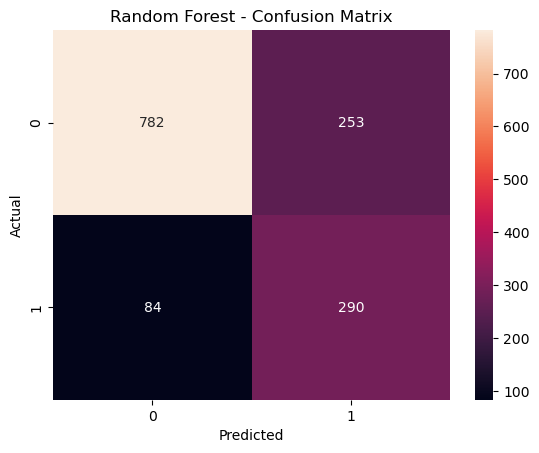

[[782 253]
 [ 84 290]]


In [156]:
# The confusion Matrix illustrates the false positve/negative as well as the true postive and negatives plotted using seaborn
cm = confusion_matrix(y_test, y_pred)
# A heatmap was generated to illustrate the False and True Values.
sns.heatmap(cm, annot=True, fmt='d')
# Tittle and Labels of the plot using mat[plotlib.
plt.title(f'{best_model_name} - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(cm)

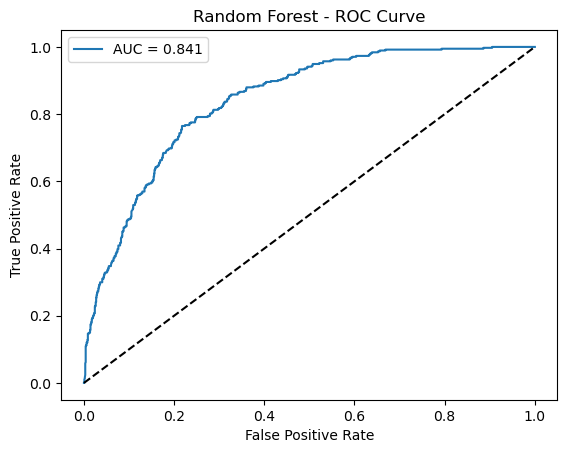

In [191]:
# Calculates False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
false_pos, true_pos, _ = roc_curve(y_test, y_prob)
#Ploted the ROC curve with the AUC score
plt.plot(false_pos, true_pos, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
# Added a line illustrating the diagonal random guess.
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'{best_model_name} - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# ROC Curve Analysis
Based on the Area under the curve score of 0.841 it tells us that the model does a good job ranking the churning customer higher then the non churning customer 84% of the time and could be a storng performing model for churn prediction.

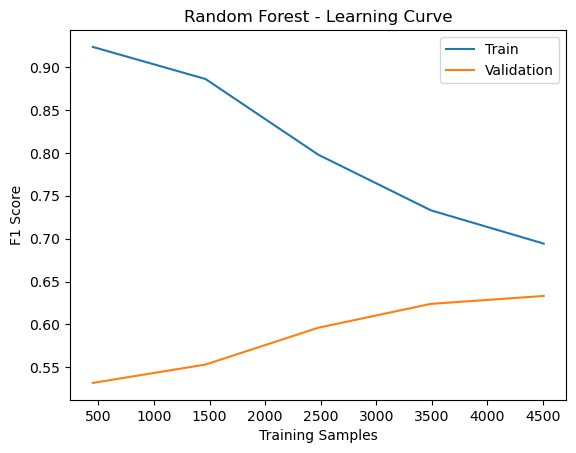

In [160]:
# Plotting the Scores for the F1 and Training samples in regards to train and validations.
train_sizes, train_scores, val_scores = learning_curve(final_model, X_train, y_train, cv=5, scoring='f1')
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation")
plt.title(f"{best_model_name} - Learning Curve")
plt.xlabel("Training Samples")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [176]:
print(train_scores.mean())
print(val_scores.mean())

0.8070073664851507
0.5876057017579004



# Learning Curve Analysis 
Based on my validation set I believe I need to fine tune alot more to get it higher maybe use more samples as there is an 
increasing trend when more samples are used. As for training the score it seems to high and stable in the start but needs more work 
to keep that stablitly. The F1 Score should be around 0.8 to 0.9 percent inorder to be a reliable model.

In [186]:
from sklearn.metrics import classification_report
# Classification report for the predictions made vs the test results
print(classification_report(y_test, y_pred, target_names=['Non-Churn', 'Churn']))

              precision    recall  f1-score   support

   Non-Churn       0.90      0.76      0.82      1035
       Churn       0.53      0.78      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



# Classification Report Analysis

Based on my results I dont believe my model at this moment is optimal. I have a moderate F1 for churn at 63% and a low precision meaning that half of my churn predictions are wrong. I have a high recall however for churn meaning that I am catching most of the at risk customers and even have an ok F1 for non churn at 82%. The model I feel lik performs moderately at this moment. 